In [1]:
import pandas as pd
import numpy as np

trip_Q1_2020 = pd.read_csv("dataset\divvy_Tripdata\Divvy_Trips_2020_Q1\Divvy_Trips_2020_Q1.csv")
trip_04_2020 = pd.read_csv(r"dataset\divvy_Tripdata\202004-divvy-tripdata\202004-divvy-tripdata.csv")
trip_05_2020 = pd.read_csv(r"dataset\divvy_Tripdata\202005-divvy-tripdata\202005-divvy-tripdata.csv")
trip_06_2020 = pd.read_csv(r"dataset\divvy_Tripdata\202006-divvy-tripdata\202006-divvy-tripdata.csv")
trip_07_2020 = pd.read_csv(r"dataset\divvy_Tripdata\202007-divvy-tripdata\202007-divvy-tripdata.csv")
trip_08_2020 = pd.read_csv(r"dataset\divvy_Tripdata\202008-divvy-tripdata\202008-divvy-tripdata.csv")
trip_09_2020 = pd.read_csv(r"dataset\divvy_Tripdata\202009-divvy-tripdata\202009-divvy-tripdata.csv")
trip_10_2020 = pd.read_csv(r"dataset\divvy_Tripdata\202010-divvy-tripdata\202010-divvy-tripdata.csv")
trip_11_2020 = pd.read_csv(r"dataset\divvy_Tripdata\202011-divvy-tripdata\202011-divvy-tripdata.csv")
trip_12_2020 = pd.read_csv(r"dataset\divvy_Tripdata\202012-divvy-tripdata\202012-divvy-tripdata.csv")

In [2]:
#combine all the data 12 months into trip_2020
trip_2020 = [trip_Q1_2020,trip_04_2020,trip_05_2020,trip_06_2020,trip_07_2020,trip_08_2020,trip_09_2020,
            trip_10_2020,trip_11_2020,trip_12_2020]
trip_2020 = pd.concat(trip_2020)
trip_2020.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member


In [3]:
trip_2020.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [4]:
trip_2020['started_at'] = pd.to_datetime(trip_2020['started_at'])
trip_2020['ended_at'] = pd.to_datetime(trip_2020['ended_at'])
trip_2020.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [5]:
trip_2020.shape

(3541683, 13)

In [6]:
trip_2020.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name     94656
start_station_id       95282
end_station_name      110881
end_station_id        111342
start_lat                  0
start_lng                  0
end_lat                 4255
end_lng                 4255
member_casual              0
dtype: int64

In [7]:
def clean_data(data):
    #remove duplicate
    data = data.drop_duplicates()
    #remove missing data
    data = data.dropna()
    # Remove start time that is equal or larger than end time
    data.drop(data[data['started_at'] >= data['ended_at']].index, inplace=True)
    return data

trip_2020 = clean_data(trip_2020)
trip_2020.shape

(3320658, 13)

In [8]:
#add column trip_duration
import datetime
trip_2020 = trip_2020.assign(trip_duration = trip_2020['ended_at'] - trip_2020['started_at']) 
trip_2020['trip_duration'] = pd.to_timedelta(trip_2020['trip_duration'])/pd.Timedelta('60s')
trip_2020['trip_duration'] = trip_2020['trip_duration'].round()
trip_2020

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.966500,-87.688400,41.967100,-87.667400,member,8.0
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.961600,-87.666000,41.954200,-87.664400,member,4.0
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.940100,-87.645500,41.940200,-87.653000,member,3.0
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.884600,-87.631900,41.891800,-87.620600,member,9.0
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.885600,-87.641800,41.889900,-87.634300,member,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131568,4631EE956BCEA738,classic_bike,2020-12-19 13:59:33,2020-12-19 14:03:21,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,41.836208,-87.613533,41.838842,-87.621857,casual,4.0
131569,D17CBEDEA8DBDFF6,electric_bike,2020-12-20 15:48:41,2020-12-20 15:52:14,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,41.836723,-87.613365,41.838723,-87.621854,member,4.0
131570,447A6C67E9AF962E,docked_bike,2020-12-02 16:59:58,2020-12-02 17:08:28,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,41.836208,-87.613533,41.838842,-87.621857,member,8.0
131571,F558C17E95751C62,electric_bike,2020-12-20 18:06:52,2020-12-20 18:09:53,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,41.836734,-87.613394,41.838749,-87.621862,member,3.0


In [9]:
#add column day_of_week
trip_2020 = trip_2020.assign(day_of_week = trip_2020['started_at'].dt.dayofweek)
trip_2020

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,day_of_week
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.966500,-87.688400,41.967100,-87.667400,member,8.0,1
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.961600,-87.666000,41.954200,-87.664400,member,4.0,3
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.940100,-87.645500,41.940200,-87.653000,member,3.0,3
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.884600,-87.631900,41.891800,-87.620600,member,9.0,0
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.885600,-87.641800,41.889900,-87.634300,member,6.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131568,4631EE956BCEA738,classic_bike,2020-12-19 13:59:33,2020-12-19 14:03:21,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,41.836208,-87.613533,41.838842,-87.621857,casual,4.0,5
131569,D17CBEDEA8DBDFF6,electric_bike,2020-12-20 15:48:41,2020-12-20 15:52:14,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,41.836723,-87.613365,41.838723,-87.621854,member,4.0,6
131570,447A6C67E9AF962E,docked_bike,2020-12-02 16:59:58,2020-12-02 17:08:28,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,41.836208,-87.613533,41.838842,-87.621857,member,8.0,2
131571,F558C17E95751C62,electric_bike,2020-12-20 18:06:52,2020-12-20 18:09:53,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,41.836734,-87.613394,41.838749,-87.621862,member,3.0,6


In [10]:
#add column for start hour
trip_2020 = trip_2020.assign(start_hour = trip_2020['started_at'].dt.hour)
trip_2020

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,day_of_week,start_hour
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.966500,-87.688400,41.967100,-87.667400,member,8.0,1,20
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.961600,-87.666000,41.954200,-87.664400,member,4.0,3,14
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.940100,-87.645500,41.940200,-87.653000,member,3.0,3,19
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.884600,-87.631900,41.891800,-87.620600,member,9.0,0,16
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.885600,-87.641800,41.889900,-87.634300,member,6.0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131568,4631EE956BCEA738,classic_bike,2020-12-19 13:59:33,2020-12-19 14:03:21,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,41.836208,-87.613533,41.838842,-87.621857,casual,4.0,5,13
131569,D17CBEDEA8DBDFF6,electric_bike,2020-12-20 15:48:41,2020-12-20 15:52:14,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,41.836723,-87.613365,41.838723,-87.621854,member,4.0,6,15
131570,447A6C67E9AF962E,docked_bike,2020-12-02 16:59:58,2020-12-02 17:08:28,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,41.836208,-87.613533,41.838842,-87.621857,member,8.0,2,16
131571,F558C17E95751C62,electric_bike,2020-12-20 18:06:52,2020-12-20 18:09:53,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,41.836734,-87.613394,41.838749,-87.621862,member,3.0,6,18


In [11]:
print(trip_2020.describe())

          start_lat     start_lng       end_lat       end_lng  trip_duration  \
count  3.320658e+06  3.320658e+06  3.320658e+06  3.320658e+06   3.320658e+06   
mean   4.190440e+01 -8.764449e+01  4.190464e+01 -8.764475e+01   2.805749e+01   
std    4.122597e-02  2.425429e-02  4.136020e-02  2.437581e-02   3.345752e+02   
min    4.164850e+01 -8.777470e+01  4.164850e+01 -8.777470e+01   0.000000e+00   
25%    4.188224e+01 -8.765804e+01  4.188266e+01 -8.765840e+01   8.000000e+00   
50%    4.189859e+01 -8.764110e+01  4.189897e+01 -8.764137e+01   1.400000e+01   
75%    4.192914e+01 -8.762780e+01  4.192955e+01 -8.762784e+01   2.600000e+01   
max    4.206490e+01 -8.752823e+01  4.206501e+01 -8.752823e+01   1.564500e+05   

        day_of_week    start_hour  
count  3.320658e+06  3.320658e+06  
mean   3.190407e+00  1.422049e+01  
std    1.977949e+00  4.619780e+00  
min    0.000000e+00  0.000000e+00  
25%    1.000000e+00  1.100000e+01  
50%    3.000000e+00  1.500000e+01  
75%    5.000000e+00  1.8000

we can see in the summary, the max of trip duration is 156450.0 minutes, which is unbelievable. This is outliers because at 75% of trip_duration is only 26 minutes. it would be better to remove them now.

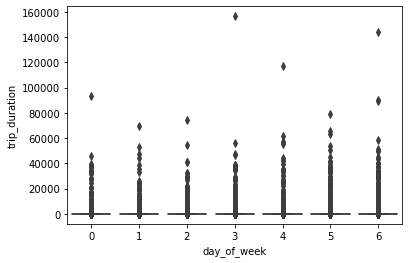

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb

fig1 = sb.boxplot(x='day_of_week', y='trip_duration', data=trip_2020)
plt.show()

in the chart above, the outliers break the clear vision of boxplot. Let remove outliers, the data should contains the trip duration from 5% to 95% values.

In [14]:
remove_outliers = trip_2020['trip_duration'].between(trip_2020['trip_duration'].quantile(0.05),trip_2020['trip_duration'].quantile(0.95))
print(str(trip_2020[~remove_outliers].shape)+"out of"+str(trip_2020.shape)+"has been removed")
trip_2020_v3 = trip_2020[remove_outliers]

(268609, 16)out of(3320658, 16)has been removed


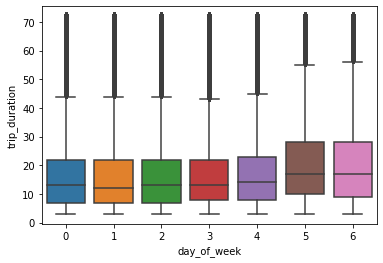

In [15]:
fig2 = sb.boxplot(x='day_of_week', y='trip_duration', data=trip_2020_v3)

In [ ]:
# save the data into csv, since the data is over 3 million rows, it cannot be store in excel file
# unless it has to be chunked down
trip_2020_v3.to_csv("trip_2020.csv")

In [16]:
# Casuals vs members
# how much of the data is about casuals and members?
member_casuals_2020 = trip_2020.groupby('member_casual')['member_casual'].count()
member_casuals_2020 = member_casuals_2020.reset_index(name='count')
member_casuals_2020

,member_casual,count
0,casual,1276075
1,member,2044583


Text(0.5, 0, 'Casuals x Member')

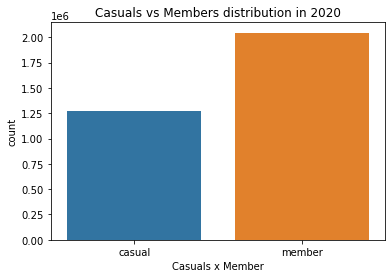

In [17]:
fig3 = sb.barplot(x='member_casual', y='count',data=member_casuals_2020)
plt.title('Casuals vs Members distribution in 2020')
plt.xlabel('Casuals x Member')

As the graph show, the member of bike service is larger than the casual by 1.6 time.

In [18]:
# seperate month
trip_2020_v1 = trip_2020.assign(month = trip_2020['started_at'].dt.month)
month_member_casual_2020 = trip_2020_v1.groupby(['member_casual','month'])['month'].count().reset_index(name='count')
month_member_casual_2020

,member_casual,month,count
0,casual,1,7624
1,casual,2,12578
2,casual,3,27199
3,casual,4,23164
4,casual,5,84852
5,casual,6,151076
6,casual,7,263990
7,casual,8,278262
8,casual,9,211509
9,casual,10,120273


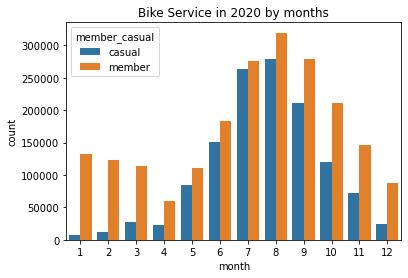

In [19]:
# plot distribution in month
fig4 = sb.barplot(x='month',y='count',hue='member_casual',data=month_member_casual_2020)
plt.title("Bike Service in 2020 by months")
plt.show()

> there are some considerations in this chart:
- August is the pitch bike service in 2020
- the amount of member is bigger than casual in most month, however there are huge difference between 
    casual and member in Jan, Feb, March, and December 
> the distribution looks loke people tends prefers cycling in summer

In [20]:
days_member_casual_2020 = trip_2020_v1.groupby(['member_casual','day_of_week'])['day_of_week'].count().reset_index(name='count')
days_member_casual_2020

,member_casual,day_of_week,count
0,casual,0,131778
1,casual,1,127726
2,casual,2,141705
3,casual,3,150937
4,casual,4,188245
5,casual,5,294650
6,casual,6,241034
7,member,0,274918
8,member,1,297068
9,member,2,310630


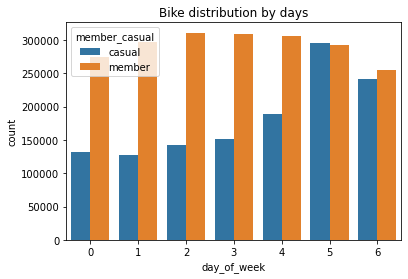

In [21]:
fig5 = sb.barplot(x='day_of_week', y='count', hue='member_casual', data=days_member_casual_2020)
plt.title("Bike distribution by days")
plt.show()

> in the graph above, we can the amount of members keeps using bike service constanly in the week day.
there are huge different between the number of using bike service between member an casual from Monday to Friday. However, in the weekend there is not different between to type of customer. 

In [22]:
days_hours_member_casual_2020 = trip_2020.groupby(['member_casual','day_of_week', 'start_hour'])['member_casual'].count().reset_index(name='count')
days_hours_member_casual_2020

,member_casual,day_of_week,start_hour,count
0,casual,0,0,2189
1,casual,0,1,1347
2,casual,0,2,715
3,casual,0,3,418
4,casual,0,4,313
...,...,...,...,...
331,member,6,19,12985
332,member,6,20,8658
333,member,6,21,5267
334,member,6,22,3247


Text(0.5, 1.0, '6-Sun')

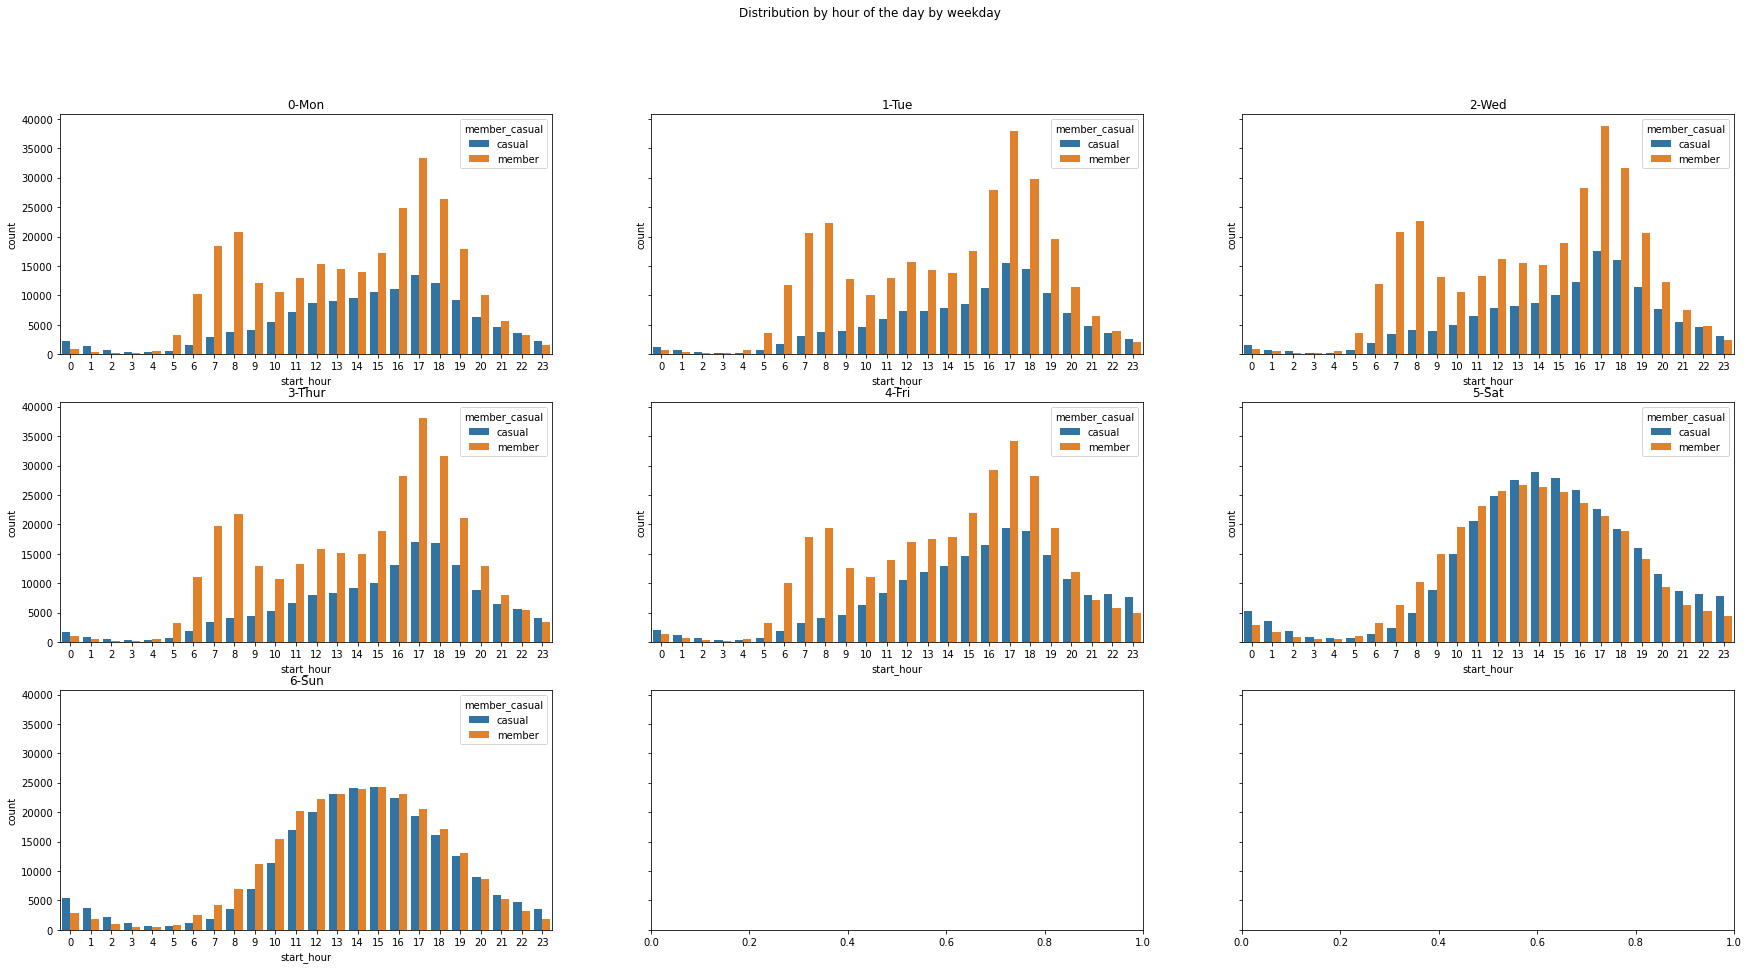

In [23]:
fig6, axes = plt.subplots(3,3, figsize=(30,15), sharey=True)
fig6.suptitle("Distribution by hour of the day by weekday")
sb.barplot(ax=axes[0,0], x='start_hour',y='count',hue='member_casual',data=days_hours_member_casual_2020[days_hours_member_casual_2020['day_of_week']==0])
axes[0,0].set_title('0-Mon')
sb.barplot(ax=axes[0,1], x='start_hour',y='count',hue='member_casual',data=days_hours_member_casual_2020[days_hours_member_casual_2020['day_of_week']==1])
axes[0,1].set_title('1-Tue')
sb.barplot(ax=axes[0,2], x='start_hour',y='count',hue='member_casual',data=days_hours_member_casual_2020[days_hours_member_casual_2020['day_of_week']==2])
axes[0,2].set_title('2-Wed')
sb.barplot(ax=axes[1,0], x='start_hour',y='count',hue='member_casual',data=days_hours_member_casual_2020[days_hours_member_casual_2020['day_of_week']==3])
axes[1,0].set_title('3-Thur')
sb.barplot(ax=axes[1,1], x='start_hour',y='count',hue='member_casual',data=days_hours_member_casual_2020[days_hours_member_casual_2020['day_of_week']==4])
axes[1,1].set_title('4-Fri')
sb.barplot(ax=axes[1,2], x='start_hour',y='count',hue='member_casual',data=days_hours_member_casual_2020[days_hours_member_casual_2020['day_of_week']==5])
axes[1,2].set_title('5-Sat')
sb.barplot(ax=axes[2,0], x='start_hour',y='count',hue='member_casual',data=days_hours_member_casual_2020[days_hours_member_casual_2020['day_of_week']==6])
axes[2,0].set_title('6-Sun')

From this chart, we can conclude that:
- there's bigger volume of riding bike in the day and tend to use more in afternoon.
- member used the service constanly in the moring between 5 to 11 am.
- in the weekend, there is no difference of using bike service between member and casual


> the fundamental question is who rides the bike, who use the bike during this time of day. There is a factor to assume, which is members use the bike for the daily routine activities such as going to work (shown from 5am to 8am in midweek), and going back from work(shown from 4pm to 6pm),

In [24]:
ridetype_member_casual_2020 = trip_2020.groupby(['rideable_type','member_casual'])['member_casual'].count().reset_index(name='count')
ridetype_member_casual_2020

,rideable_type,member_casual,count
0,classic_bike,casual,11050
1,classic_bike,member,58002
2,docked_bike,casual,1121659
3,docked_bike,member,1778987
4,electric_bike,casual,143366
5,electric_bike,member,207594


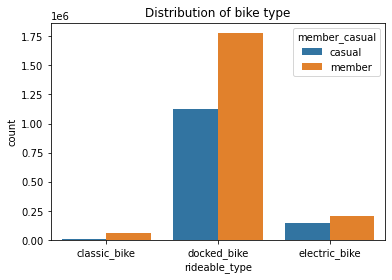

In [25]:
fig7 = sb.barplot(x='rideable_type',y='count',hue='member_casual',data=ridetype_member_casual_2020)
plt.title('Distribution of bike type')
plt.show()

From this chart, we can see that docked bike is the most used. This may be because the company has more docked bike than other.
They also invested on electric bike.

Text(0.5, 1.0, 'Casual')

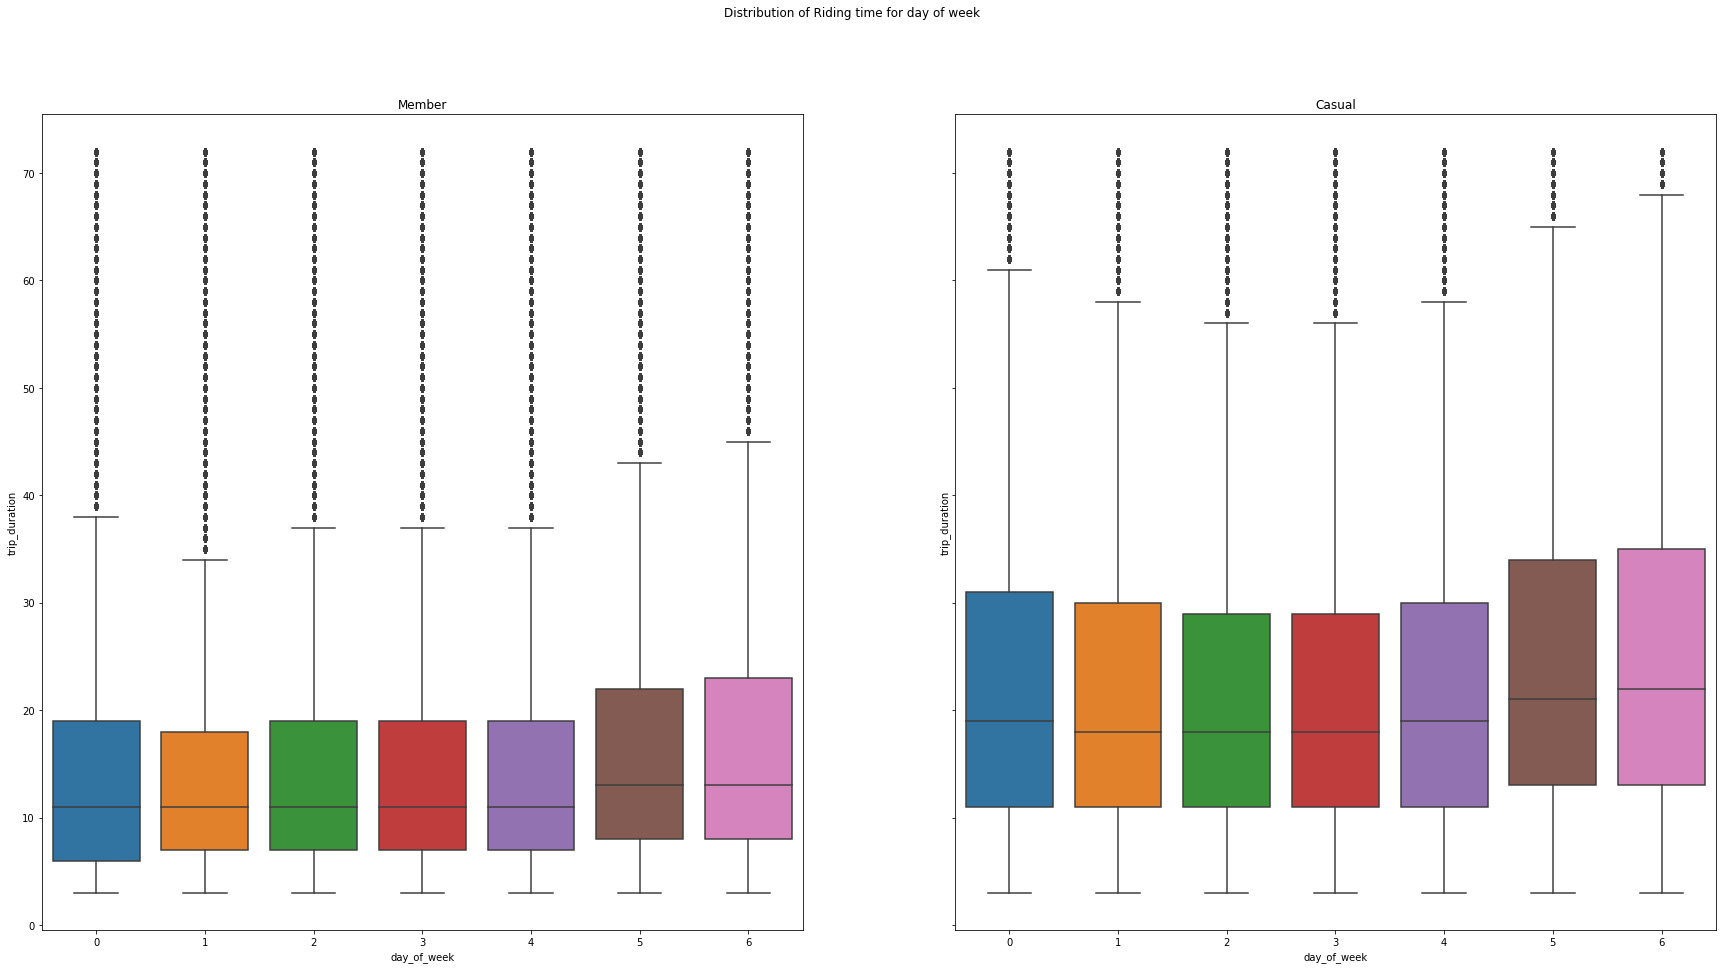

In [26]:
fig7, axes2 = plt.subplots(1,2, figsize=(30,15), sharey=True)
fig7.suptitle("Distribution of Riding time for day of week")
sb.boxplot(ax=axes2[0], x='day_of_week',y='trip_duration',data=trip_2020_v3[trip_2020_v3['member_casual']=='member'])
axes2[0].set_title('Member')
sb.boxplot(ax=axes2[1], x='day_of_week',y='trip_duration',data=trip_2020_v3[trip_2020_v3['member_casual']=='casual'])
axes2[1].set_title('Casual')

> one thing suprises me is that casual tend to spend more time on the bike service than the member.
the mean and IQR is also bigger for casual, which we can see the average of casual spend around 20 minutes. whereas the average of member spend more than 10 minutes.

In [27]:
import folium

ModuleNotFoundError: No module named 'folium'

In [ ]:
# Save the cleaned version.
trip_2020_v3.to_csv("trip_2020_v3.csv")

## Share

Normally, to report the share to the stakeholde, the presentation is good choice but Notebook allows to using markdown, so I can share this notebook

>what the dataset tells me about:
- Members have the biggest propotion of the dataset
- August is be month when customer used the bike service most in Chicago.
- Member always take more amount of using bike service than casuals
- Seasons affects on the number of bike service, since people dont want to ride bikes in cold weather.
- Casuals tend to use the bike service in the weekend.
- People prefers using bike service in the afternoon.

> it is easy to relize that the distribution of rides by month is cyclical through years because of Chicago's seasons. The questions is why member using bike service more than casual? One good answer is member has more demand of using bike in the Chicago's downtown than the casual.
Besides, we don't see the difference of using bike service between member and casual in the weekend. I believe that the bike were ultized for more recreational ways. 
> the diffrence between member and casuals:
- Beside the weekend, members have the biggest comsuming the bike service in weekday.
- Casual tends to use bike service mostly in weekend.
- Members use the bike constanly from Monday to Friday between 5am to 11am and keep increase at the afternoon. While casuals start using the bike between 11am to 4pm.
-  There's an increase of data points in the midweek between 6am to 8am for members. Then it fell a bit. Another big increase is from 5pm to 6pm.
- During the weekend we have a bigger flow of casuals between 11am to 6pm. However, the trend of casual riding bike is not changed in the midweek.
- Members have a bigger preference for classic bikes, 56% more.
- Casuals have more riding time than members.
- Riding time for members keeps unchanged during the midweek, increasing during weekends.

From this information, we get that members have a more fixed use for bikes besides casuals. Their uses is for more routine activities, like:
-Go to work.
-Use it as an exercise.

This can be proven by looking at the fig4 showing more members in between 6am to 8am and at 5pm to 6pm. Also, members may have set routes when using the bikes, as proven by riding time for members keeps unchanged during the midweek, increasing during weekends. The bikes is also heavily used for recreation on the weekends, when riding time increases and casuals take place.

Members also have a bigger preference for classic bikes, so they can exercise when going to work.

Concluding:

Members use the bikes for fixed activities, one of those is going to work.
Bikes are used for recreation on the weekends.
Rides are influenced by season.

#### Guiding questions 
- Were you able to answer the question of how annual members and casual riders use Cyclistic bikes differently?
    yes, The data shows several differences between casuals and member
- what story does your data tell?
    the story of data tells is that members have set schedules, as seen in graph 4 on key timestamps. Those timestamp tells that members ride bikes for routine activities such as goint to work. The graph 7 shows that members spend less time to ride bike because of their set routine.
- How do your finding relate to your original question?
    the findings build a profile for members, relating to "find the key difference between casuals and annual riders", also knowing why they use bikes help to find "how digital media could influence them"
- Who is your audience? what is the best way to communicate them?
    the main target audience is my cyclistic marketing analytics team and Lily Moreno. The best way to communicate is through the power point presentation of the findings.
- Can data visualization help you share your findings?
    Yes, the main core of the finds is through the data visualization.
- is your presentation accessible to your audience?
    Yes, the plot were made using vibrant colors, and corresponding labels.

## ACT
The act phase would be done by the marketing team of the company. The main takeaway will be the top three recommendations for the marketing.

#### Guiding questions
- What is your final conclusion based on your analysis?
Members and casual have different habits when using the bikes. The conclusion is further stated on the share phase.

- How could your team and business apply your insights?
The insights could be implemented when preparing a marketing campaign for turning casual into members. The marketing can have a focus on workers as a green way to get to work.

- What next steps would you or your stakeholders take based on your findings?
Further analysis could be done to improve the findings, besides that, the marketing team can take the main information to build a marketing campaign.

- Is there additional data you could use to expand on your findings?
    - Mobility data.
    - Improved climate data.
    - More information members.

#### Deliverable 
1. Build a marketing campaing focus on the casual group telling them that becoming member is benefit to their routine of going to work, keep the planet green, keep user in good health, and avoid the traffic jam.
2. increasing more rewards to member when riding bike in the winter season.
3. Increasing the number of electronic bike is way to go, It is my believe that consumer is prefer using electronic for daily routine such as going to work. It will save time and energy for the working day.